**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2023 &#x25aa; Uhan**

# Lesson 23. The One-Way ANOVA Model &ndash; Part 2 

## Example.

A study was designed to compare the effect of three different high-protein diets on weight gain in baby rats.
The data is stored in `FatRats` in our textbook data library `Stat2Data`.

The subjects for the study were 30 baby rats.
Each was fed a high-protein diet from one of three sources: beef, cereal, or pork.
Their weight gains were recorded in grams.
We would like to test whether average weight gain differs from protein source.

First, let's load and preview the data:

In [1]:
library(Stat2Data)
data(FatRats)
head(FatRats)

,Gain,Protein,Source
,<int>,<fct>,<fct>
1,73,Hi,Beef
2,102,Hi,Beef
3,118,Hi,Beef
4,104,Hi,Beef
5,81,Hi,Beef
6,107,Hi,Beef


Next, we create a new dataframe, keeping only the rats who got a high-protein diet:

In [2]:
FatRats.HighProtein <- FatRats[FatRats$Protein == 'Hi', ]

To visualize the weight gains grouped by protein source, we make boxplots:

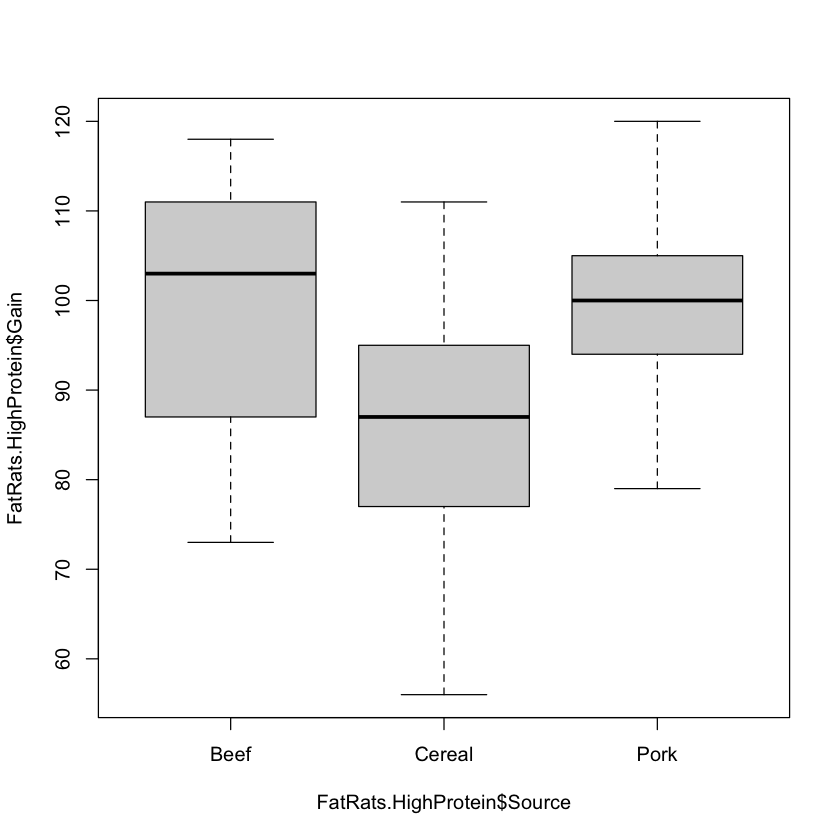

In [3]:
boxplot(FatRats.HighProtein$Gain ~ FatRats.HighProtein$Source)

We use `tapply` to apply a function to each group.

For example, we can compute the number of observations in each group, by applying `length` to each group:

In [4]:
n.k <- tapply(FatRats.HighProtein$Gain, FatRats.HighProtein$Source, length)
n.k

Beef Cereal   Pork 
    10     10     10

We can compute the mean weight gain in each group by applying `mean` to each group:

In [5]:
ybar.k <- tapply(FatRats.HighProtein$Gain, FatRats.HighProtein$Source, mean)
ybar.k

Beef Cereal   Pork 
 100.0   85.9   99.5

We can also compute the standard deviation of the weight gain in each group:

In [6]:
sd.k <- tapply(FatRats.HighProtein$Gain, FatRats.HighProtein$Source, sd)
sd.k

Beef   Cereal     Pork 
15.13642 15.02184 10.91635

Next, we compute the parameter estimates:

In [7]:
ybar <- mean(FatRats.HighProtein$Gain)
alpha.k <- ybar.k - ybar

ybar
alpha.k

[1] 95.13333

Beef    Cereal      Pork 
 4.866667 -9.233333  4.366667

Finally, we compute the ANOVA table:

In [8]:
test <- aov(FatRats.HighProtein$Gain ~ FatRats.HighProtein$Source)
summary(test)

                           Df Sum Sq Mean Sq F value Pr(>F)  
FatRats.HighProtein$Source  2   1280   640.0   3.346 0.0503 .
Residuals                  27   5165   191.3                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1